In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns

## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataframe=pd.read_csv(r'E:\STUDIES\data science\ML\PROJECTS\Fraud_Transaction_Detection_Project\Fraud.csv')

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
dataframe

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
print('Not Fraud transaction', round(dataframe['isFraud'].value_counts()[0]/len(dataframe) * 100,2), '% of the dataset')
print('Fraud transaction', round(dataframe['isFraud'].value_counts()[1]/len(dataframe) * 100,2), '% of the dataset')

Not Fraud transaction 99.87 % of the dataset
Fraud transaction 0.13 % of the dataset


In [5]:
df_isFlaggedFraud = dataframe[dataframe['isFlaggedFraud']==1]
df_isFlaggedFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [6]:
df_isFlaggedFraud['amount'].mean()

4861597.730625

In [7]:
df_isFraud = dataframe[dataframe['isFraud']==1]
df_isFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [8]:
df_isFraud['amount'].mean()

1467967.299140387

### Thus we notice that when the amount is excessively high it is Flagged fraud

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
#USED IN THE IDE FOR TRAINING AND TESTING

fraud_df = dataframe.loc[dataframe['isFraud'] == 1]
non_fraud_df = dataframe[dataframe['isFraud'] == 0][:len(fraud_df)]
dataframe= pd.concat([fraud_df, non_fraud_df])
dataframe.reset_index(drop=True, inplace=True)

## Structure of non-numerical features

Data types can be numerical and non-numerical. First, let’s take a closer look at the non-numerical entries.

In [10]:
# Display non-numerical features
dataframe.select_dtypes(exclude="number").head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


In [11]:
categorical_features = [feature for feature in dataframe.columns if dataframe[feature].dtypes == 'O']
dataframe_categorical = dataframe[categorical_features]
dataframe_categorical

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


In [12]:
df3 = dataframe.drop(categorical_features, axis =1)
df3.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [13]:
dataframe.describe(exclude="number")

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


##  Structure of numerical features

In [14]:
dataframe.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
#variance in the numerical features
dataframe.var()

C:\Users\Asus\AppData\Local\Temp/ipykernel_16276/740526131.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.var()


step              5.668921e+04
amount            3.383140e+12
oldbalanceOrg     8.837804e+12
newbalanceOrig    4.615585e+12
oldbalanceDest    9.301670e+12
newbalanceDest    1.237797e+13
isFraud           2.500152e-01
isFlaggedFraud    9.731759e-04
dtype: float64

In [17]:
numerical_features = [feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']
dataframe_numerical = dataframe[numerical_features]
dataframe_numerical

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,181.00,181.00,0.00,0.00,0.00,1,0
1,1,181.00,181.00,0.00,21182.00,0.00,1,0
2,1,2806.00,2806.00,0.00,0.00,0.00,1,0
3,1,2806.00,2806.00,0.00,26202.00,0.00,1,0
4,1,20128.00,20128.00,0.00,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...
16421,7,5656.37,16440.00,10783.63,0.00,0.00,0,0
16422,7,450.21,1195.00,744.79,0.00,0.00,0,0
16423,7,343435.88,744.79,0.00,351181.52,1674676.75,0,0
16424,7,193433.79,17050.00,210483.79,135960.54,0.00,0,0


## Quality Investigation

In [18]:
#Null values
dataframe.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
dataframe['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


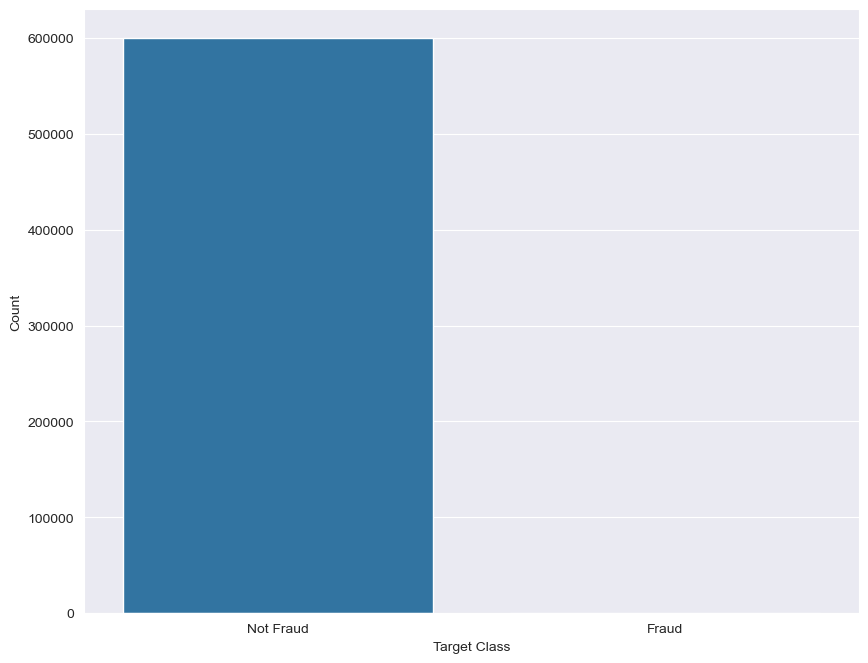

In [15]:
plt.figure(dpi=100)
sns.set_style('darkgrid')
sns.countplot('isFraud',data = dataframe)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0,1],['Not Fraud','Fraud'])
plt.show()

## We notice that the dataset is highly imbalanced

In [16]:
dataframe['isFlaggedFraud'].value_counts()

0    600000
Name: isFlaggedFraud, dtype: int64

In [19]:
print(len(df_isFraud['nameOrig'].unique()))
print(len(df_isFraud['nameDest'].unique()))

8213
8169


## Distribution of Transaction Amount

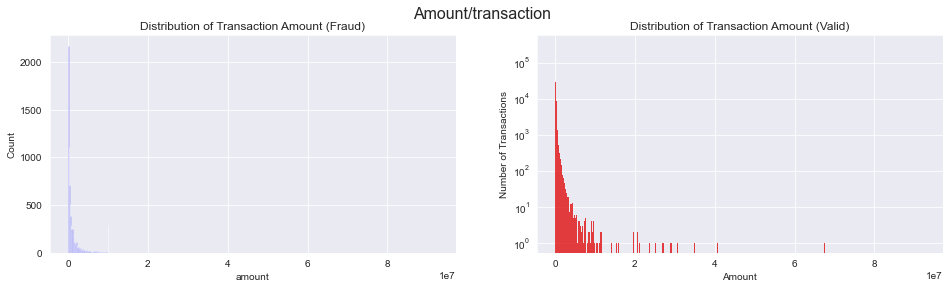

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(16,4), sharex=True)
fig.suptitle('Amount/transaction', fontsize=16)
colors = ["#0101DF", "#DF0101"]

sns.histplot(dataframe[dataframe['isFraud']==1].amount, ax=ax[0], color=colors[0])
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')

ax[0].set_title('Distribution of Transaction Amount (Fraud)')

sns.histplot(dataframe[dataframe['isFraud']==0].amount, ax=ax[1], color=colors[1])
ax[1].set_title('Distribution of Transaction Amount (Valid)')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')

plt.yscale('log')
plt.show();

## Distribution of Transaction Amount with Time

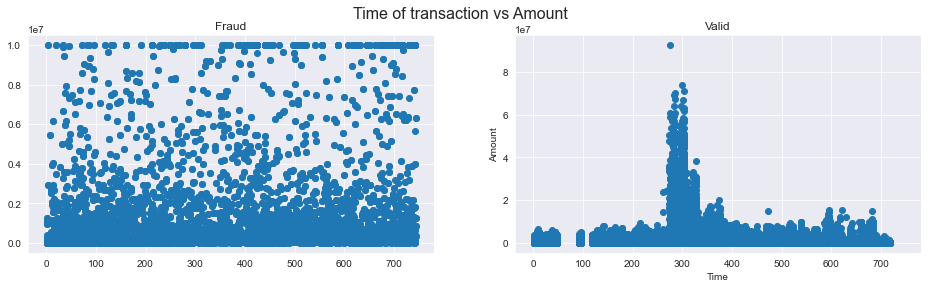

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(16,4), sharex=True)
fig.suptitle('Time of transaction vs Amount', fontsize=16)


ax[0].scatter(dataframe[dataframe['isFraud']==1].step, dataframe[dataframe['isFraud']==1].amount)
ax[0].set_title('Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
ax[1].scatter(dataframe[dataframe['isFraud']==0].step, dataframe[dataframe['isFraud']==0].amount)
ax[1].set_title('Valid')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [20]:
print(len(df_isFlaggedFraud['nameOrig'].unique()))
print(len(df_isFlaggedFraud['nameDest'].unique()))

16
16


ALL THE TRANSFERS THAT ARE FLAGGED FRAUD IS BY FRAUDULENT AGENTS i.e. belongs to isFraud

Since the account IDs are all different, we can conclude that not a single accoubt ID was used more than once for fraudulent activities.

In [21]:
#transaction of more than 2million at once
dataframe[dataframe['amount']>2000000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
359,1,TRANSFER,2421578.09,C106297322,0.00,0.00,C1590550415,8515645.77,19169204.93,0,0
375,1,TRANSFER,2545478.01,C1057507014,0.00,0.00,C1590550415,12394437.40,19169204.93,0,0
376,1,TRANSFER,2061082.82,C2007599722,0.00,0.00,C1590550415,14939915.42,19169204.93,0,0
1153,1,TRANSFER,3776389.09,C197491520,0.00,0.00,C1883840933,10138670.86,16874643.09,0,0
1202,1,TRANSFER,2258388.15,C12139181,0.00,0.00,C1789550256,2784129.27,4619798.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.00,0.00,1,1
6362598,742,TRANSFER,4009058.39,C1044665079,4009058.39,0.00,C750074708,0.00,0.00,1,0
6362599,742,CASH_OUT,4009058.39,C1970706589,4009058.39,0.00,C637394241,1229761.96,5238820.34,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

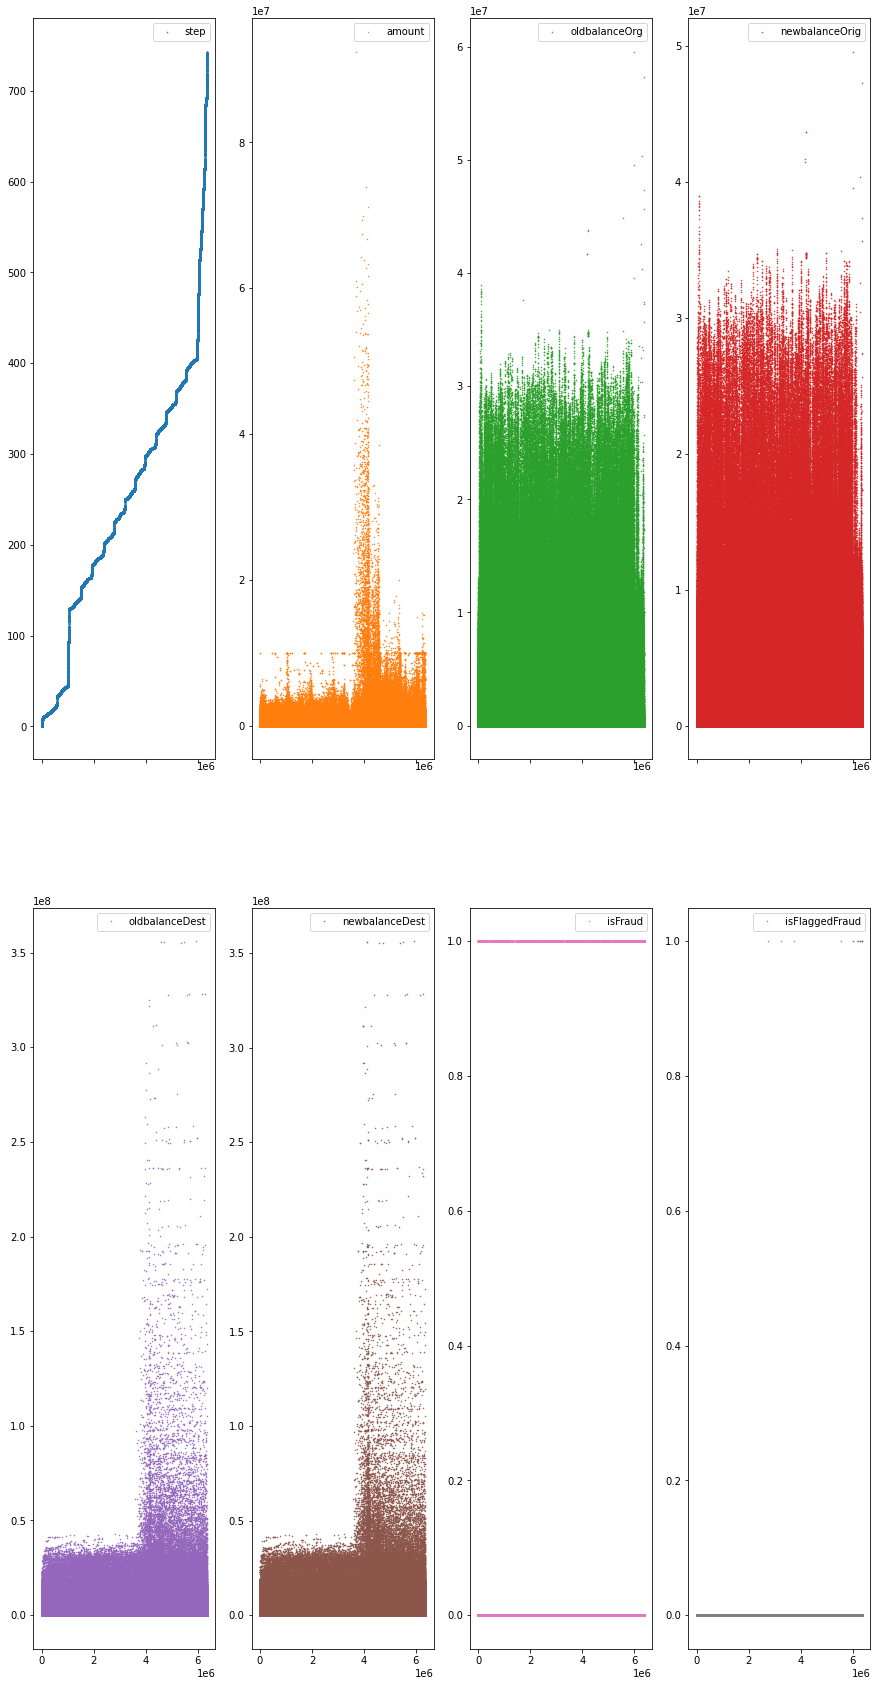

In [20]:
#Using the .plot() function in pandas to visualize the numerical features' distribution


#lw=0: lw stands for line width. 0 means that we don’t want to show any lines
#marker=".": Instead of lines, we tell the plot to use . as markers for each data point
#subplots=True: subplots tells pandas to plot each feature in a separate subplot
#layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 2 means to use 2 columns per row.
#figsize=(15, 30), markersize=1: To make sure that the figure is big enough.
dataframe.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1)

<AxesSubplot:>

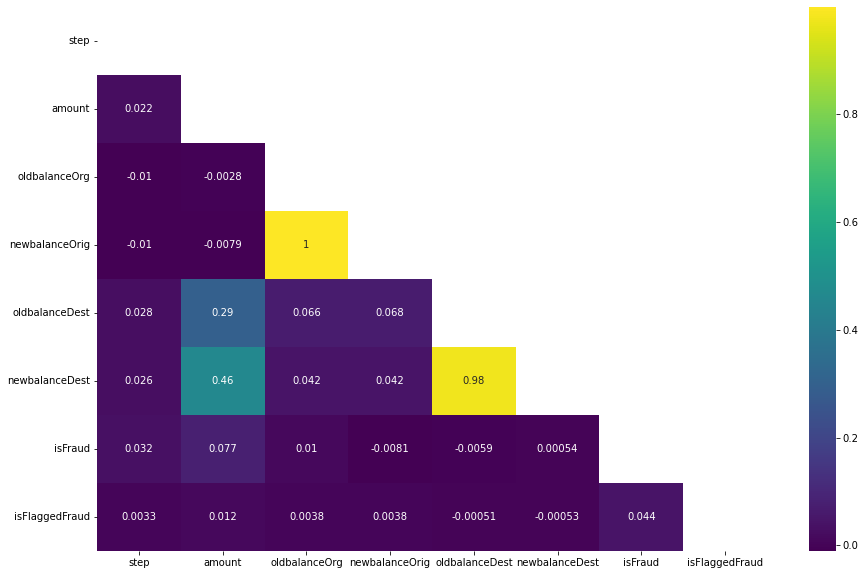

In [21]:
df_correlation = dataframe.drop(columns=['type','nameOrig','nameDest']).corr()
plt.figure(figsize=(15,10))
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_correlation, dtype=bool))
sns.heatmap(df_correlation,annot=True,cmap='viridis',mask=mask)

# We notice old Balance origin and new balance origin are massively correlated.

# We also notice old Balance destination and new balance destination are massively correlated.

In [10]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = dataframe_numerical.columns
vif["vif_Factor"] = [variance_inflation_factor(dataframe_numerical.values, i) for i in range(dataframe_numerical.shape[1])]
vif

,features,vif_Factor
0,step,1.191094
1,amount,4.078952
2,oldbalanceOrg,544.053103
3,newbalanceOrig,546.346008
4,oldbalanceDest,72.895522
5,newbalanceDest,84.584619
6,isFraud,1.188386
7,isFlaggedFraud,1.002546


The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. It is used for diagnosing collinearity/multicollinearity. 

### Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [4]:
features = list(dataframe_numerical.columns)
features.remove('oldbalanceOrg')
features.remove('oldbalanceDest')

In [12]:
def compute_vif(considered_features):
    
    X = dataframe_numerical[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [13]:
compute_vif(features)

C:\Users\Asus\AppData\Local\Temp/ipykernel_16904/4143346114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,step,1.001875
1,amount,1.278203
2,newbalanceOrig,1.002857
3,newbalanceDest,1.273122
4,isFraud,1.010306
5,isFlaggedFraud,1.002081


###  VIF can be computed for each predictor in a predictive model. A value of 1 means that the predictor is not correlated with other variables. The higher the value, the greater the correlation of the variable with other variables.

In [13]:
dataframe_numerical = dataframe_numerical.drop(['oldbalanceOrg'], axis =1)
dataframe_numerical = dataframe_numerical.drop(['oldbalanceDest'], axis =1)
dataframe_numerical

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,160296.36,0.00,0,0
1,1,1864.28,19384.72,0.00,0,0
2,1,181.00,0.00,0.00,1,0
3,1,181.00,0.00,0.00,1,0
4,1,11668.14,29885.86,0.00,0,0
...,...,...,...,...,...,...
6362615,743,339682.13,0.00,339682.13,1,0
6362616,743,6311409.28,0.00,0.00,1,0
6362617,743,6311409.28,0.00,6379898.11,1,0
6362618,743,850002.52,0.00,0.00,1,0


#### We have dropped oldbalanceOrg and oldbalanceDest from the numerical dataframe as they had high variance inflation factor. We will work with only the new balance.

### Outliers

<AxesSubplot:>

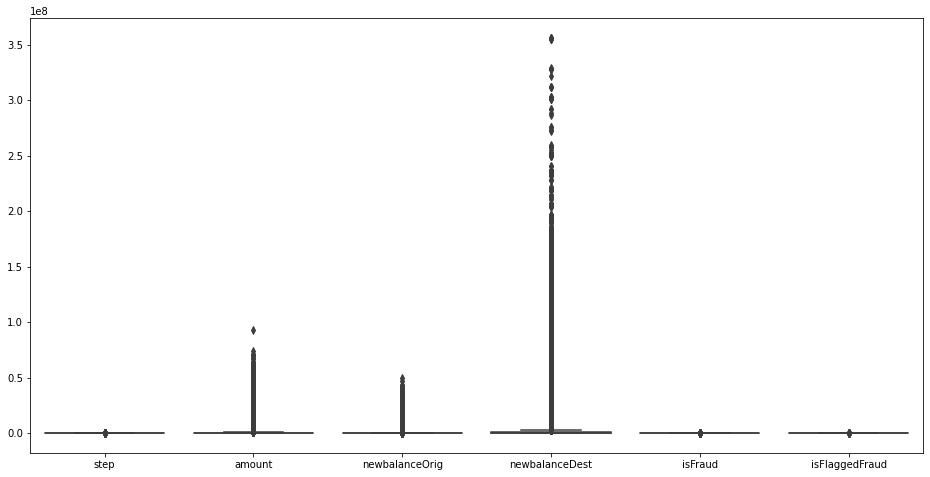

In [19]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=dataframe_numerical)

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>]], dtype=object)

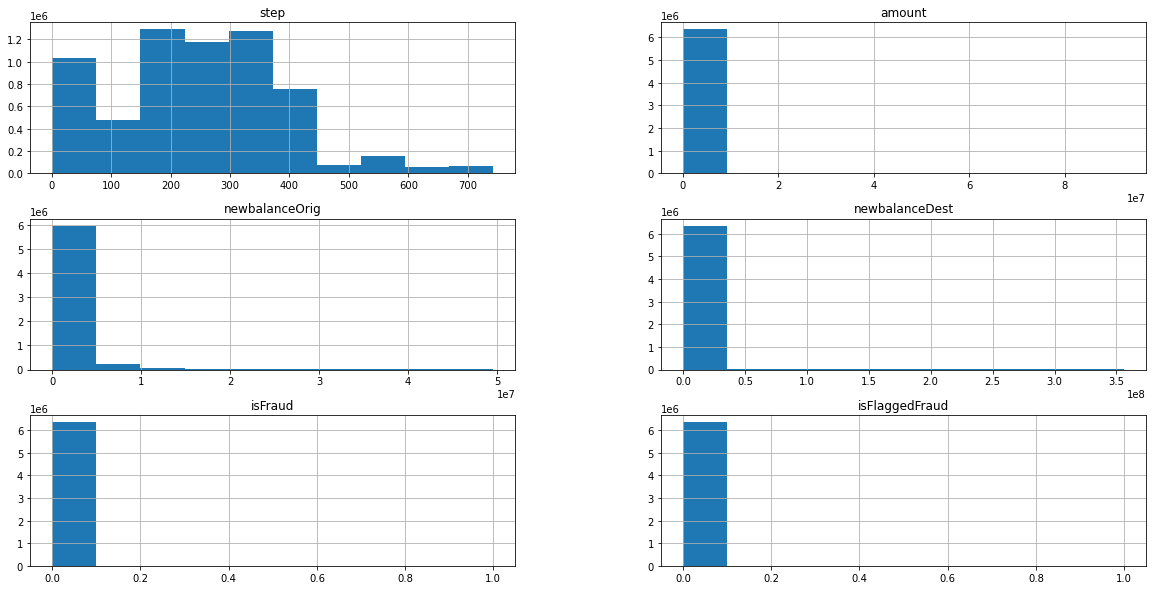

In [20]:
dataframe_numerical.hist(figsize=(20,10))

Data is heavily skewed. We will counter ways to deal with this issue in the notebook. We will check whether preprocessing techniques work better when there is an overwhelming majority class in the data.

#### Implication of imbalanced classes:

Overfitting: From the analysis it is clear that the data is heavily imbalanced as most of the transactions are valid. By default our model might predict every scenario to be valid and still have a good accuracy. We do not want that. So let us try to balance the classes.

Wrong Correlations: It will be useful to understand how each feature influence the result (Valid or Fraud). Having an imbalance dataframe causes us to miss the true correlations between class and features.

### Dealing with Imbalanced Data Set

It is obvious looking at the data that there is a clear majority and minority class in the distribution. Data is heavily skewed. We will counter ways to deal with this issue in the notebook. We will check whether preprocessing techniques work better when there is an overwhelming majority class in the data.

There are several ways to approach this classification problem taking into consideration this unbalance.
Collect more data

Changing the performance metric:

Confusion matrix: Table showing correct predictions and types of incorrect predictions.
Precision: The number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
Recall: The number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
F1score: The weighted average of precision and recall.
Kappa: The classification accuracy normalized by the imbalance of classes.
ROC curves: The ratio between sensitivity and specificity.
ROC curves should be used if there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance.

Resampling the dataset

Process the data to have approximately 1:1 ratio between the classes.
Over-sampling (add copies of under-represented class)
Under-sampling, (delete instances from over-represented class)

Oversampling Minority Classes

Oversampling involves the addition of copies of minority class. It is an optimum choice when we do not have much data.

In [81]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost



In [23]:
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [24]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_curve

### Splitting the Data (Original DataFrame)
Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? 
##### for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. 
The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [20]:
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(dataframe_numerical['isFraud'].value_counts()[0]/len(dataframe_numerical) * 100,2), '% of the dataset')
print('Frauds', round(dataframe_numerical['isFraud'].value_counts()[1]/len(dataframe_numerical) * 100,2), '% of the dataset')

X = dataframe_numerical.drop('isFraud', axis=1)
y = dataframe_numerical['isFraud']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset
Train: [ 1643  1644  1645 ... 16423 16424 16425] Test: [   0    1    2 ... 9853 9854 9855]
Train: [    0     1     2 ... 16423 16424 16425] Test: [ 1643  1644  1645 ... 11495 11496 11497]
Train: [    0     1     2 ... 16423 16424 16425] Test: [ 3286  3287  3288 ... 13137 13138 13139]
Train: [    0     1     2 ... 16423 16424 16425] Test: [ 4929  4930  4931 ... 14780 14781 14782]
Train: [    0     1     2 ... 14780 14781 14782] Test: [ 6571  6572  6573 ... 16423 16424 16425]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.49996195 0.50003805]
[0.50015221 0.49984779]


In [21]:
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',original_Xtrain.shape,original_ytrain.shape,'\nTesting set   ---> ', original_Xtest.shape, original_ytest.shape)

Original set  --->  (16426, 7) (16426,) 
Training set  --->  (13141, 7) (13141,) 
Testing set   --->  (3285, 7) (3285,)


#### We will use ROBUST SCALER as it is less prone to outliers.

Scale features using statistics that are robust to outliers.

It scales features using statistics that are robust to outliers. 

This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. 
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. 


Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [25]:
rob_scaler = preprocessing.RobustScaler()

print('\033[1mTransformation on Training set'.center(120))
Train_X_tr = rob_scaler.fit_transform(original_Xtrain)
Train_X_tr = pd.DataFrame(Train_X_tr, columns=X.columns)
display(Train_X_tr.describe())

print('\n','\033[1mTransformation on Testing set'.center(120))
Test_X_tr = rob_scaler.transform(original_Xtest)
Test_X_tr = pd.DataFrame(Test_X_tr, columns=X.columns)
display(Test_X_tr.describe())

                                           Transformation on Training set                                           


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,13141.000000,13141.000000,13141.000000,13141.000000,13141.000000,13141.000000,13141.000000
mean,0.494408,1.277803,1.073985,31.956300,3.303720,1.622057,0.000609
std,0.659585,3.525879,2.681014,115.654273,13.951928,4.937428,0.024667
min,-0.017422,-0.233052,-0.141021,0.000000,0.000000,0.000000,0.000000
25%,-0.013937,-0.213897,-0.124362,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.986063,0.786103,0.875638,1.000000,1.000000,1.000000,0.000000
max,2.052265,19.696079,58.490831,2934.599086,1051.288353,327.718363,1.000000



                                            Transformation on Testing set                                            


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000
mean,1.158344,1.521308,1.369438,43.681781,3.486016,1.819238,0.002435
std,1.161343,4.173091,3.737593,165.010460,11.936618,4.590660,0.049296
min,0.000000,-0.233052,-0.141021,0.000000,0.000000,0.000000,0.000000
25%,0.003484,-0.203329,-0.124485,0.000000,0.000000,0.000000,0.000000
50%,0.003484,0.027218,-0.007523,0.000000,0.000000,0.000000,0.000000
75%,2.317073,0.756271,0.896358,0.756449,0.855701,0.886282,0.000000
max,2.567944,19.696079,56.258340,2800.325214,205.343034,64.938306,1.000000


### ROC PLOT ANALYSIS WITH LOGISTIC REGRESSION FOR DIFFERENT RESAMPLING TECHNIQUES

In [26]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,roc_curve
def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(16,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

In [27]:
from sklearn.model_selection import train_test_split
def logistic(X,y):
    lr=LogisticRegression()
    if len(X)==6362620:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)
        lr.fit(X_train,y_train)
        prob=lr.predict_proba(X_test)
        return (prob[:,1],y_test)
    else:
        original_Xtrain=X
        original_ytrain=y
        lr.fit(original_Xtrain,original_ytrain)
        prob=lr.predict_proba(original_Xtest)
        return (prob[:,1],original_ytest)
        

ROC plot analysis for imbalanced data


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


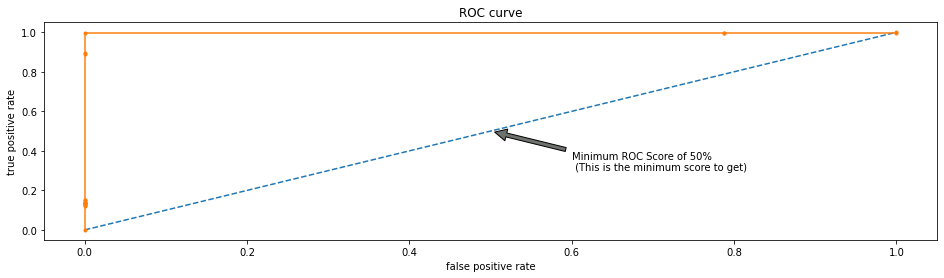

In [28]:
print('ROC plot analysis for imbalanced data')
probs,y_test=logistic(X,y)
plot_roc(y_test,probs)

ROC plot analysis for imbalanced data


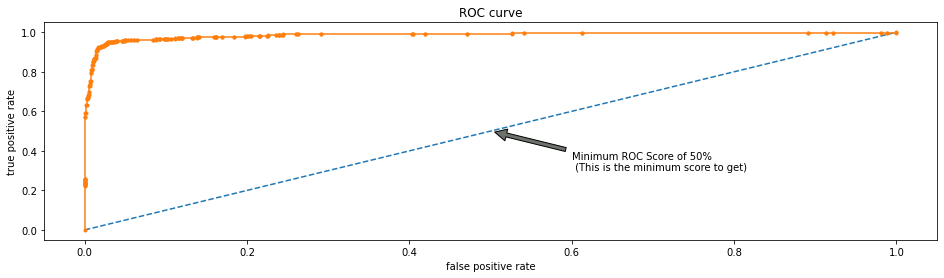

In [29]:
#Using StratifiedKFold split
print('ROC plot analysis for imbalanced data')
probs,y_test=logistic(original_Xtrain,original_ytrain)
plot_roc(y_test,probs)

0    8213
1    8213
Name: isFraud, dtype: int64


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Class')

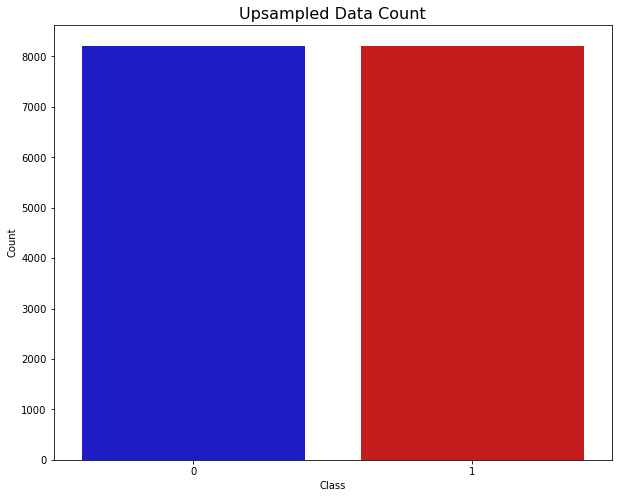

In [30]:
from sklearn.utils import resample
upsampled_fraud = resample(dataframe_numerical[dataframe_numerical.isFraud==1],replace=True, n_samples=len(dataframe_numerical[dataframe_numerical.isFraud==0]), random_state=21) 
upsampled = pd.concat([dataframe_numerical[dataframe_numerical.isFraud==0], upsampled_fraud])

print(upsampled.isFraud.value_counts())
colors = ["#0101DF", "#DF0101"]
sns.countplot(upsampled.isFraud, palette=colors)
plt.title('Upsampled Data Count', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Class')

ROC plot analysis for imbalanced data after Upsampling


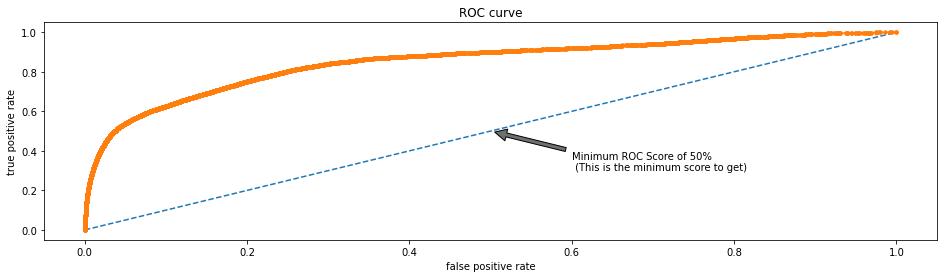

In [30]:
print('ROC plot analysis for imbalanced data after Upsampling')
probs,y_test=logistic(upsampled.drop('isFraud', axis=1),upsampled['isFraud'])
plot_roc(y_test,probs)

1    8213
0    8213
Name: isFraud, dtype: int64


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Class')

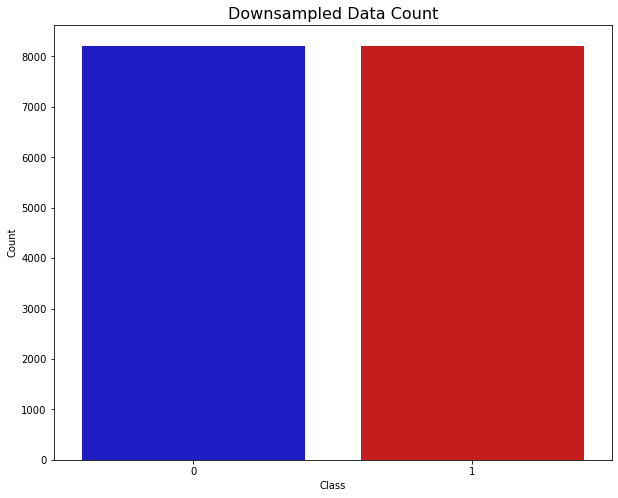

In [33]:
downsampled_fraud = resample(dataframe_numerical[dataframe_numerical.isFraud==0],replace=True, n_samples=len(dataframe_numerical[dataframe_numerical.isFraud==1]), random_state=21) 
downsampled = pd.concat([dataframe_numerical[dataframe_numerical.isFraud==1], downsampled_fraud])

print(downsampled.isFraud.value_counts())
colors = ["#0101DF", "#DF0101"]
sns.countplot(downsampled.isFraud, palette=colors)
plt.title('Downsampled Data Count', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Class')

ROC plot analysis for imbalanced data after Downsampling


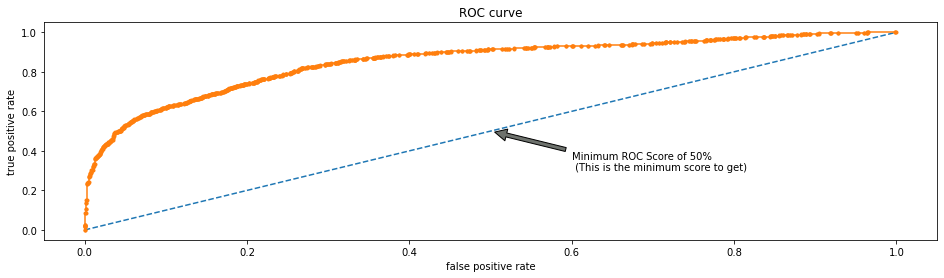

In [34]:
print('ROC plot analysis for imbalanced data after Downsampling')
probs,y_test=logistic(downsampled.drop('isFraud', axis=1),downsampled['isFraud'])
plot_roc(y_test,probs)

# Overfitting during Cross Validation:

In our undersample analysisoften there is a common mistake. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why? Because you will be directly influencing the validation set before implementing cross-validation causing a 
##### "data leakage" 
problem. We will see amazing precision and recall scores but in reality our data is overfitting!

As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched!

### Oversampling using SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()



log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(random_state=42), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 5090096 | Length of y (train): 5090096
Length of X (test): 1272524 | Length of y (test): 1272524
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.4847046077094393
precision: 0.0022718376868198892
recall: 0.906697108066971
f1: 0.004532295882937589
---------------------------------------------------------------------------------------------------------------------------------------


In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(dataframe_numerical.drop(['isFraud'], axis=1), dataframe_numerical['isFraud'])

ROC plot analysis for imbalanced data after Upsampling with SMOTE


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


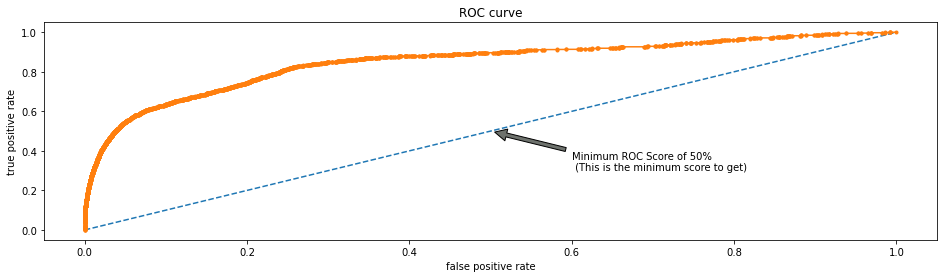

In [32]:
print('ROC plot analysis for imbalanced data after Upsampling with SMOTE')
probs,y_test=logistic(pd.DataFrame(X_sm),pd.DataFrame(y_sm))
plot_roc(y_test,probs)

# MODEL BUILDING

In [31]:
classification_models={
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [32]:
from sklearn.model_selection import cross_val_score


for key, classifier in classification_models.items():
    classifier.fit(original_Xtrain, original_ytrain)
    training_score = cross_val_score(classifier, original_Xtrain, original_ytrain, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifiers:  LogisticRegression Has a training score of 80.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 82.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 96.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 86.0 % accuracy score


In [33]:
y_test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
 y_test.shape

(3285,)

In [ ]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

### SCHEMA.YAML FILE

In [4]:
dataframe.dtypes.index,dataframe.dtypes.values

(Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
        'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
        'isFlaggedFraud'],
       dtype='object'),
 array([dtype('int64'), dtype('O'), dtype('float64'), dtype('O'),
        dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'),
        dtype('float64'), dtype('int64'), dtype('int64')], dtype=object))

In [5]:
data_type = list(map(lambda x:str(x).replace("dtype('","").replace("')","") ,dataframe.dtypes.values))

In [6]:
column = dataframe.columns

In [7]:
dict(zip(column,data_type))

{'step': 'int64',
 'type': 'object',
 'amount': 'float64',
 'nameOrig': 'object',
 'oldbalanceOrg': 'float64',
 'newbalanceOrig': 'float64',
 'nameDest': 'object',
 'oldbalanceDest': 'float64',
 'newbalanceDest': 'float64',
 'isFraud': 'int64',
 'isFlaggedFraud': 'int64'}